# Regressione_Multipla_Subgroup

In [1]:
import pandas as pd
import seaborn as sns #Visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

medical = pd.read_csv('insurance.csv') # importiamo il dataset e leggiamo il csv
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
medical.describe() # funzione che descrive il dataset con indicazioni su min, max e medie

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


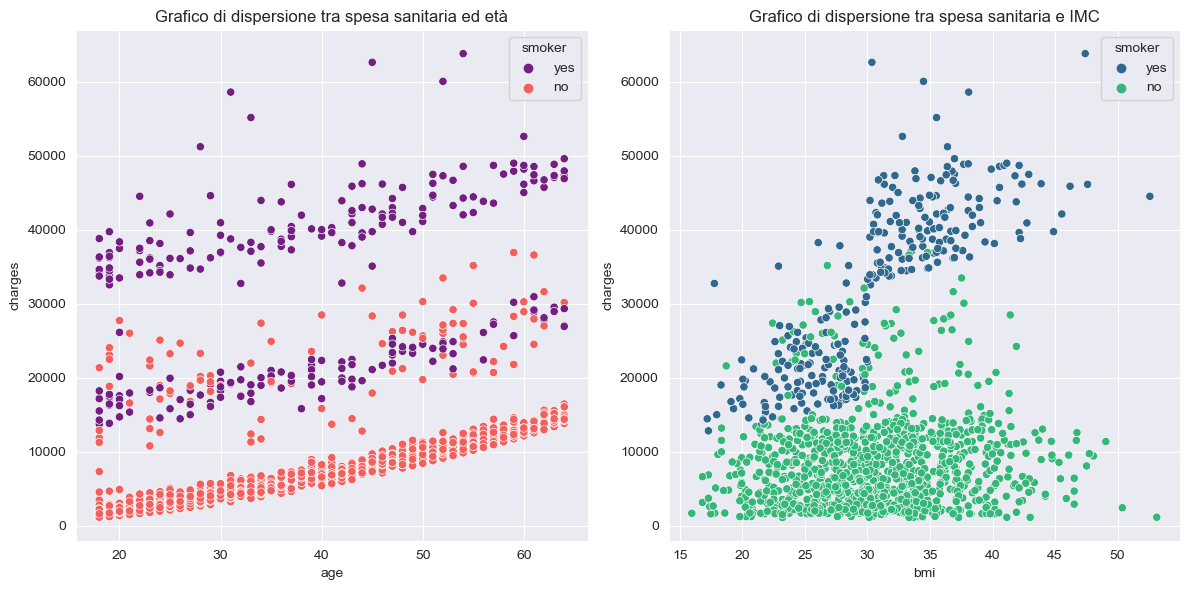

In [8]:
# Crea una figura con 2 righe e 2 colonne
f = plt.figure(figsize=(12,6))

# Primo grafico: Età vs Spesa sanitaria
ax = f.add_subplot(121)  # Prima riga, prima colonna
sns.scatterplot(x='age', y='charges', data=medical, palette='magma', hue='smoker', ax=ax)
ax.set_title('Grafico di dispersione tra spesa sanitaria ed età')

# Secondo grafico: BMI vs Spesa sanitaria
ax = f.add_subplot(122)  # Prima riga, seconda colonna
sns.scatterplot(x='bmi', y='charges', data=medical, palette='viridis', hue='smoker', ax=ax)
ax.set_title('Grafico di dispersione tra spesa sanitaria e IMC')

# Mostra i grafici
plt.tight_layout()  # Evita sovrapposizioni
plt.show()

**Standardizziamo i dati** in modo da ottenere valori simili tra di loro e comparabili

In [11]:
medical_encoded = pd.get_dummies(medical, drop_first=True)  # funzione che implementa OHE per convertire le variabili

# Matrice di correlazione
corr_matrix = medical_encoded.corr()
print(corr_matrix)

                       age       bmi  children   charges  sex_male  \
age               1.000000  0.109272  0.042469  0.299008 -0.020856   
bmi               0.109272  1.000000  0.012759  0.198341  0.046371   
children          0.042469  0.012759  1.000000  0.067998  0.017163   
charges           0.299008  0.198341  0.067998  1.000000  0.057292   
sex_male         -0.020856  0.046371  0.017163  0.057292  1.000000   
smoker_yes       -0.025019  0.003750  0.007673  0.787251  0.076185   
region_northwest -0.000407 -0.135996  0.024806 -0.039905 -0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982  0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210 -0.004184   

                  smoker_yes  region_northwest  region_southeast  \
age                -0.025019         -0.000407         -0.011642   
bmi                 0.003750         -0.135996          0.270025   
children            0.007673          0.024806         -0.023066   
charges             0.78725

In [15]:
# Definiamo la variabile indipendente e la variabile dipendente (charges)
X = medical_encoded[['smoker_yes','bmi']].values
Y = medical_encoded['charges'].values

# Suddividiamo il dataset in training e test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inizializziamo il modello di regressione lineare
ll = LinearRegression()
ll.fit(X_train, Y_train)  # Addestriamo il modello

# Facciamo previsioni sui dati di test
Y_pred = ll.predict(X_test)

# Calcolo dell'MSE e R2
MSE = mean_squared_error(Y_test, Y_pred)
print("Errore quadratico medio: " + str(MSE))

R2S = r2_score(Y_test, Y_pred)
print("Valore di R2 (standardizzazione dell'MSE): " + str(R2S))

Errore quadratico medio: 47887940.85942348
Valore di R2 (standardizzazione dell'MSE): 0.6915405337018099
